# TIKTOK CLAIM PROJECT

## Understanding and analysing data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("tiktok_dataset.csv")

In [5]:
df.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
df['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

The counts of each claim status are quite balanced.

**Examining the engagement trends associated with each different claim status.**

In [11]:
df.groupby('claim_status').agg(
    {'video_share_count':['mean', 'median'],
    'video_like_count':['mean', 'median'],
    'video_view_count':['mean', 'median']})

video_share_count          video_like_count            \
                          mean   median             mean    median   
claim_status                                                         
claim             33026.416216  17997.5    166373.331182  123649.0   
opinion             217.145631    121.0      1092.729844     823.0   

             video_view_count            
                         mean    median  
claim_status                             
claim           501029.452748  501555.0  
opinion           4956.432250    4953.0

The mean and the median within each claim category are close to one another,except for the video_share_count because median is almost double the mean in that case, but there is a vast discrepancy between view,like and share counts for videos labeled as claims and videos labeled as opinions.

In [13]:
df.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

There are many more claim videos with banned authors than there are opinion videos with banned authors. This could mean a number of things, including the possibilities that:
* Claim videos are more strictly policed than opinion videos
* Authors must comply with a stricter set of rules if they post a claim than if they post an opinion

In [15]:
df.groupby('author_ban_status').agg(
    {'video_share_count':['mean', 'median'],
    'video_like_count':['mean', 'median'],
    'video_view_count':['mean', 'median']})

video_share_count          video_like_count            \
                               mean   median             mean    median   
author_ban_status                                                         
active                 14111.466164    437.0     71036.533836    2222.0   
banned                 29998.942508  14468.0    153017.236697  105573.0   
under review           25774.696999   9444.0    128718.050339   71204.5   

                  video_view_count            
                              mean    median  
author_ban_status                             
active               215927.039524    8616.0  
banned               445845.439144  448201.0  
under review         392204.836399  365245.5

In [16]:
df.groupby('author_ban_status')['video_share_count'].median()

author_ban_status
active            437.0
banned          14468.0
under review     9444.0
Name: video_share_count, dtype: float64

Banned authors have a median share count that's 33 times the median share count of active authors

In [18]:
df.groupby('author_ban_status').agg(
    {'video_share_count':['count','mean', 'median'],
    'video_like_count':['count','mean', 'median'],
    'video_view_count':['count','mean', 'median']})

video_share_count                        video_like_count  \
                              count          mean   median            count   
author_ban_status                                                             
active                        15383  14111.466164    437.0            15383   
banned                         1635  29998.942508  14468.0             1635   
under review                   2066  25774.696999   9444.0             2066   

                                           video_view_count                 \
                            mean    median            count           mean   
author_ban_status                                                            
active              71036.533836    2222.0            15383  215927.039524   
banned             153017.236697  105573.0             1635  445845.439144   
under review       128718.050339   71204.5             2066  392204.836399   

                             
                     median  
author_ban_status            
active               8616.0  
banned             448201.0  
under review       365245.5

Bnanned authors and Under_review authors get more views than active authors.
Overall statistics of active authors is much lower than that of 'banned' & ' verified' authors

In [20]:
#Creating new features
df['like_per_view'] = df['video_like_count']/df['video_view_count']
df['share_per_view'] = df['video_share_count']/df['video_view_count']
df['comment_per_view'] = df['video_comment_count']/df['video_view_count']

In [21]:
df.groupby(['claim_status','author_ban_status']).agg(
    {'like_per_view':['count','mean', 'median'],
    'share_per_view':['count','mean', 'median'],
    'comment_per_view':['count','mean', 'median']})

like_per_view                      \
                                       count      mean    median   
claim_status author_ban_status                                     
claim        active                     6566  0.329542  0.326538   
             banned                     1439  0.345071  0.358909   
             under review               1603  0.327997  0.320867   
opinion      active                     8817  0.219744  0.218330   
             banned                      196  0.206868  0.198483   
             under review                463  0.226394  0.228051   

                               share_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.065456  0.049279   
             banned                      1439  0.067893  0.051606   
             under review                1603  0.065733  0.049967   
opinion      active                      8817  0.043729  0.032405   
             banned                       196  0.040531  0.030728   
             under review                 463  0.044472  0.035027   

                               comment_per_view                      
                                          count      mean    median  
claim_status author_ban_status                                       
claim        active                        6566  0.001393  0.000776  
             banned                        1439  0.001377  0.000746  
             under review                  1603  0.001367  0.000789  
opinion      active                        8817  0.000517  0.000252  
             banned                         196  0.000434  0.000193  
             under review                   463  0.000536  0.000293

Videos by banned authors and those under review tend to get far more views, likes, and shares than videos by non-banned authors. However, *when a video does get viewed*, its engagement rate is less related to author ban status and more related to its claim status.

Also, claim videos have a higher view rate than opinion videos, but this tells us that claim videos also have a higher rate of likes on average, so they are more favorably received as well. Furthermore, they receive more engagement via comments and shares than opinion videos.

For claim videos, banned authors have slightly higher likes/view and shares/view rates than active authors or those under review. However, for opinion videos, active authors and those under review both get higher engagement rates than banned authors in all categories.

* Of the 19,382 samples in this dataset, just under 50% are claims&mdash;9,608 of them.  
* Engagement level is strongly correlated with claim status. This should be a focus of further inquiry.
* Videos with banned authors have significantly higher engagement than videos with active authors. Videos with authors under review fall between these two categories in terms of engagement levels.

## Visualising and Interpretting all columns

In [24]:
# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Build visualizations

In [26]:
df

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,like_per_view,share_per_view,comment_per_view
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000702,0.000000
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.135111,0.004855
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.003168,0.000365
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.079569,0.001335
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.073175,0.002706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Boxplot generator
def boxplotter(column_str,fig):
    fig=plt.figure(figsize=fig)
    sns.boxplot(x=df[column_str])
    plt.title(f'Box plot of {column_str}')

#Histogram Generator
def histogrammer(column_str,fig,bin_range):
    fig=plt.figure(figsize=fig)
    sns.histplot(x=df[column_str],bins=bin_range)
    plt.title(f'Histogram plot of {column_str}')

### Video Duration Sec

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


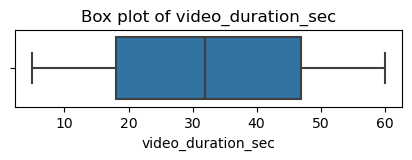

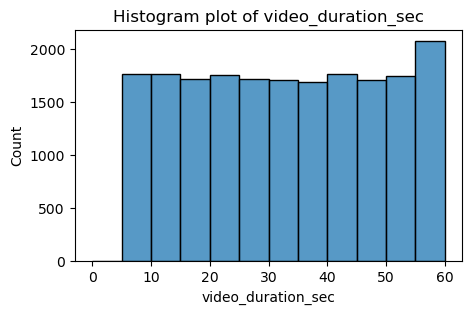

In [29]:
#Boxplot for video_duration_sec
boxplotter('video_duration_sec',(5,1))

# Histogram for video_duration_sec
histogrammer('video_duration_sec',(5,3),range(0,61,5))

All videos are 5-60 seconds in length, and the distribution is uniform.

### Video View Count

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


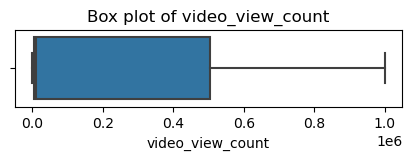

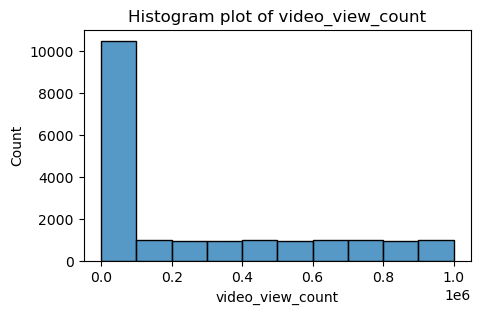

In [32]:
#Boxplot for video_duration_sec
boxplotter('video_view_count',(5,1))

# Histogram for video_duration_sec
histogrammer('video_view_count',(5,3),range(0,(10**6+1),10**5))

This variable has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views. Distribution of view counts > 100,000 views is uniform.

### Video Like Count

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


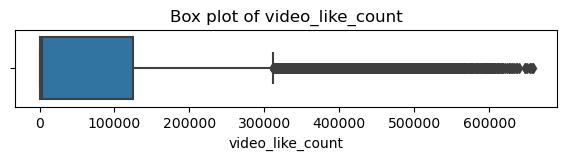

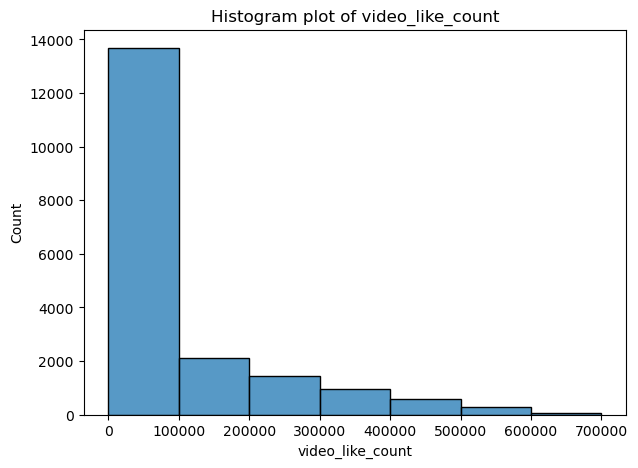

In [35]:
#Boxplot for video__like_count
boxplotter('video_like_count',(7,1))

# Histogram for video_like_count
histogrammer('video_like_count',(7,5),range(0,(7*10**5+1),10**5))

Similar to view count, there are far more videos with < 100,000 likes than there are videos with more. However, in this case, there is more of a taper, as the data skews right, with many videos at the upper extremity of like count.

### Video Share Count

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


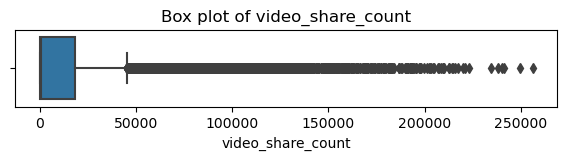

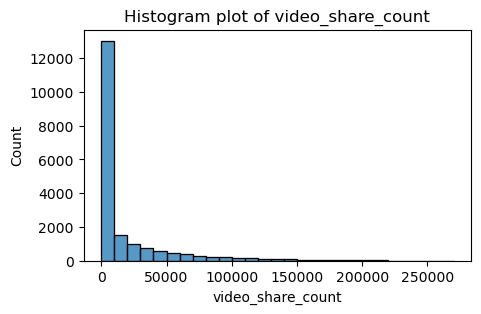

In [38]:
#Boxplot for video_share_count
boxplotter('video_share_count',(7,1))

# Histogram for video_share_count
histogrammer('video_share_count',(5,3),range(0,(270001),10000))

The overwhelming majority of videos had fewer than 10,000 shares. The distribution is very skewed to the right.

### Video Comment Count

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


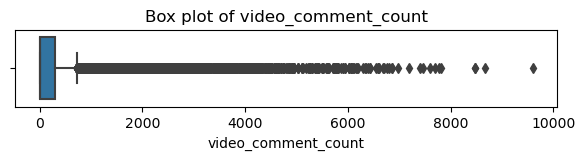

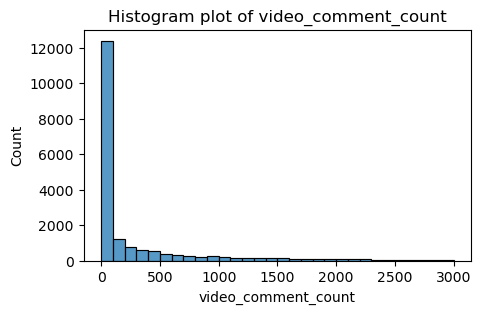

In [41]:
#Boxplot for video_comment_count
boxplotter('video_comment_count',(7,1))

# Histogram for video_comment_count
histogrammer('video_comment_count',(5,3),range(0,(3001),100))

The vast majority of videos are grouped at the bottom of the range of values for video comment count. Most videos have fewer than 100 comments. The distribution is very right-skewed.

### Video Download Count

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


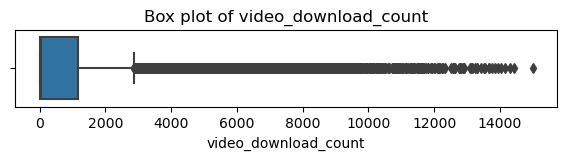

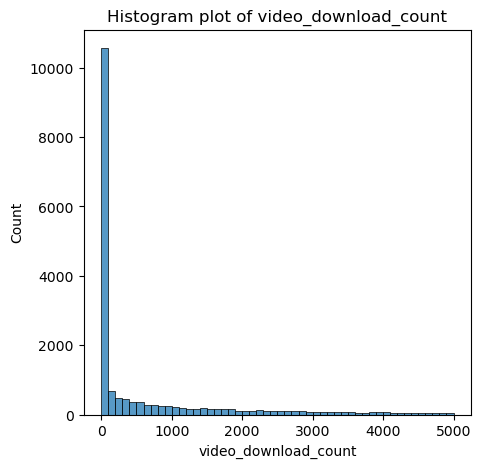

In [44]:
#Boxplot for video_download_count
boxplotter('video_download_count',(7,1))

# Histogram for video_download_count
histogrammer('video_download_count',(5,5),range(0,(5001),100))

The majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. The data is very skewed to the right.

### Claim status by verification status

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


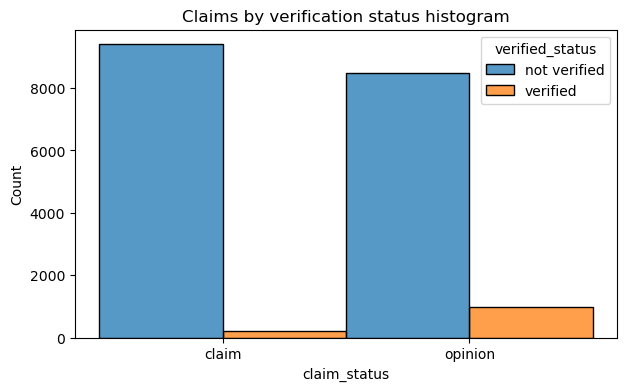

In [47]:
fig = plt.figure(figsize=(7,4))
sns.histplot(data=df,
            x='claim_status',
            hue='verified_status',
            multiple='dodge')
plt.title('Claims by verification status histogram');

There are far fewer verified users than unverified users, but if a user *is* verified, they are much more likely to post opinions.

### Claim status by Author ban status

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


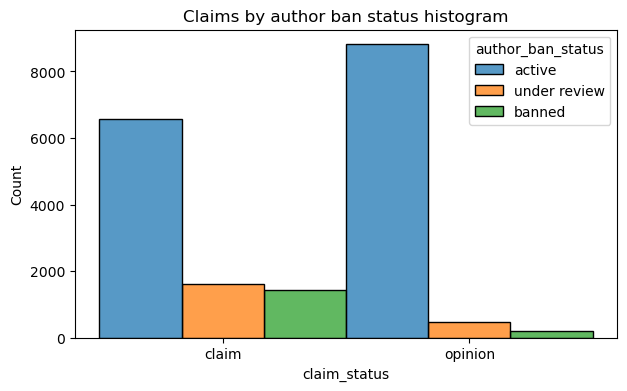

In [50]:
fig = plt.figure(figsize=(7,4))
sns.histplot(data=df,
            x='claim_status',
            hue='author_ban_status',
            hue_order=['active', 'under review', 'banned'],  
            multiple='dodge')
plt.title('Claims by author ban status histogram');

For both claims and opinions, there are many more active authors than banned authors or authors under review; however, the proportion of active authors is far greater for opinion videos than for claim videos. It seems that authors who post claim videos are more likely to come under review and/or get banned.

### Median view counts by ban status

Text(0.5, 1.0, 'Median view count by ban status')

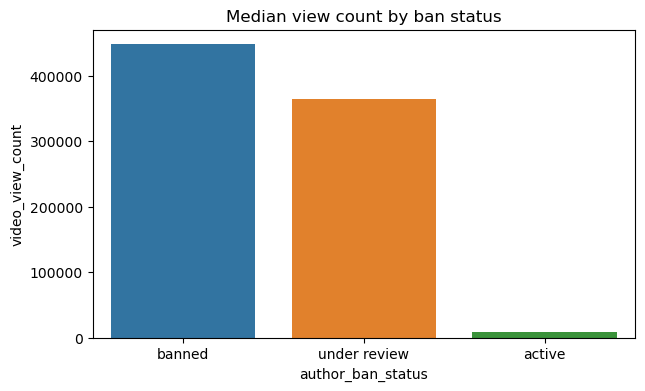

In [53]:
fig = plt.figure(figsize=(7,4))
median=df.groupby('author_ban_status')['video_view_count'].median().reset_index()
sns.barplot(data=median, 
            x='author_ban_status', 
            y='video_view_count',
            order=['banned','under review','active'])
plt.title('Median view count by ban status')

The median view counts for banned & under-review authors are many times greater than the median view count for active authors. Since non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then video_view_count might be a good indicator of claim status.

Indeed, a quick check of the median view count by claim status bears out this assessment

### Median view counts by claim status

Text(0.5, 1.0, 'Median view count by claim status')

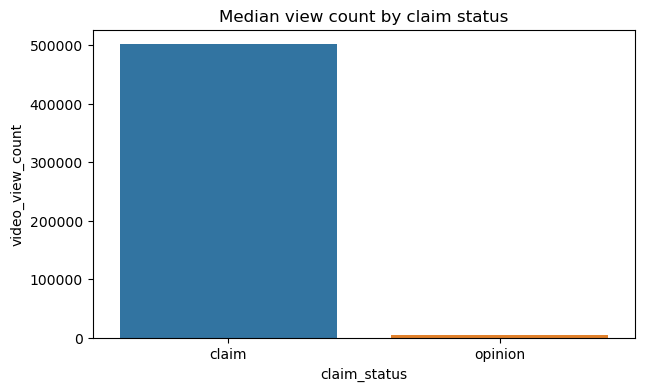

In [56]:
fig = plt.figure(figsize=(7,4))
median=df.groupby('claim_status')['video_view_count'].median().reset_index()
sns.barplot(data=median, 
            x='claim_status', 
            y='video_view_count')
plt.title('Median view count by claim status')

The overall view count is dominated by claim videos even though there are roughly the same number of each video in the dataset.

### Determining Outliers

In [59]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for col in count_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    median = df[col].median()
    outlier_threshold = median + 1.5*iqr
    # Counting the number of values that exceed the outlier threshold
    outlier_count = (df[col] > outlier_threshold).sum()
    print(f'Number of outliers, {col}:', outlier_count)
    

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


### Scatter plot


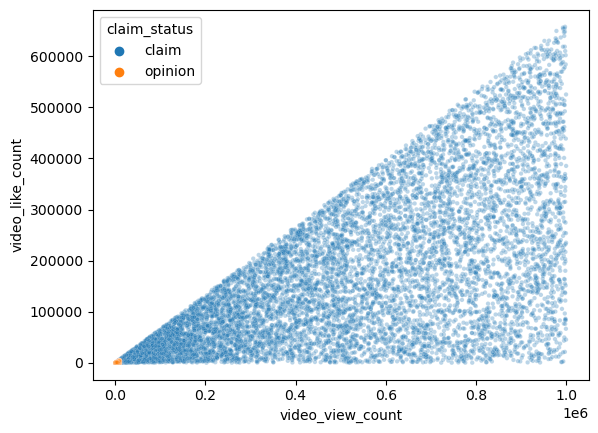

In [61]:
# Creating a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
sns.scatterplot(x=df["video_view_count"], y=df["video_like_count"],
                hue=df["claim_status"], s=10, alpha=.3)
plt.show()

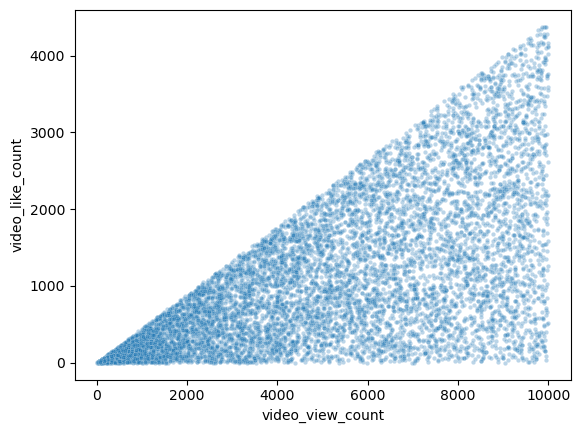

In [62]:
# Create a scatterplot of `video_view_count` versus `video_like_count` for opinions only
opinion = df[df['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
plt.show()

## Data exploration and hypothesis testing

In [64]:
# Packages for statistical analysis/hypothesis testing
from scipy import stats

In [65]:
# Check for missing values
df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
like_per_view               298
share_per_view              298
comment_per_view            298
dtype: int64

In [66]:
# Drop rows with missing values
df = df.dropna(axis=0)

### Relationship between verified_status and video_view_count.

In [68]:
df.groupby('verified_status')['video_view_count'].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

Stating Hypothesis

**$H_0$**: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).

**$H_A$**: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).

Significance Level
5%.

In [70]:
# Conducting a two-sample t-test to compare means
# Save each sample in a variable
not_verified = df[df["verified_status"] == "not verified"]["video_view_count"]
verified = df[df["verified_status"] == "verified"]["video_view_count"]

# Implement a t-test using the two samples
stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

TtestResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120, df=1571.163074387424)

Since the p-value is extremely small (much smaller than the significance level of 5%),reject the null hypothesis. Concluding that there is a statistically significant difference in the mean video view count between verified and unverified accounts on TikTok.

In [72]:
# Perform the Mann-Whitney U Test (Non-Parametric Test)
u_stat, p_value = stats.mannwhitneyu(not_verified, verified, alternative='two-sided')

# Print the result
print(f"U-statistic: {u_stat}")
print(f"p-value: {p_value}")

# Report based on p-value
if p_value < 0.05:
    print("We reject the null hypothesis: There is a significant difference in the video view counts.")
else:
    print("We fail to reject the null hypothesis: There is no significant difference in the video view counts.")

U-statistic: 14477078.5
p-value: 1.9312984413553236e-91
We reject the null hypothesis: There is a significant difference in the video view counts.


Advantages of Mann-Whitney U Test:
	•	No Assumption of Normality: Unlike the t-test, which assumes normality of the data, the Mann-Whitney U test does not assume that the data follows any specific distribution.
	•	Robust to Outliers: Since it’s based on the ranks of data, it’s less sensitive to outliers than the t-test.

The analysis shows that there is a statistically significant difference in the average view counts between videos from verified accounts and videos from unverified accounts. This suggests there might be fundamental behavioral differences between these two groups of accounts.

Do unverified accounts tend to post more clickbait-y videos? Or are unverified accounts associated with spam bots that help inflate view counts?

The next step will be to build a regression model on verified_status. A regression model for verified_status can help analyze user behavior in this group of verified users. Because the data is skewed, and there is a significant difference in account types, it will be key to build a logistic regression model.

## Regression modeling

#### Handling Outliers

In [77]:
# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [78]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]
def outlierhandle(column_str):
    q1 = df[column_str].quantile(0.25)
    q3 = df[column_str].quantile(0.75)
    
    iqr = q3-q1
    threshold = q3 + 1.5 * iqr
    
    df.loc[df[column_str] > threshold, "video_like_count"] = threshold

for col in count_cols:
    outlierhandle(col)

In [79]:
# Check class balance
df["verified_status"].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

In [80]:
#Resampling to create a balance in the outcome variable
df_majority = df[df['verified_status']=='not verified']
df_minority = df[df['verified_status']=='verified']

df_minority_upsampled = resample(df_minority,replace=True,n_samples=len(df_majority),random_state=0)

df_upsampled = pd.concat([df_majority,df_minority_upsampled]).reset_index(drop=True)

df_upsampled['verified_status'].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

In [81]:
#Adding a NEW FEATURE 
df_upsampled['text_length'] = df_upsampled['video_transcription_text'].apply(len)
df_upsampled

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,like_per_view,share_per_view,comment_per_view,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000702,0.000000,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.135111,0.004855,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.003168,0.000365,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.079569,0.001335,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.073175,0.002706,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35763,4736,claim,9170014897,42,i learned on social media a claim that most c...,verified,active,993273.0,45382.5,112538.0,126.0,62.0,0.296345,0.113300,0.000062,75
35764,14662,opinion,4841249433,55,my family's point of view is that a single day...,verified,active,6688.0,2431.0,449.0,42.0,3.0,0.363487,0.067135,0.000449,76
35765,18418,opinion,8292890373,39,my colleagues are willing to wager that the ea...,verified,active,5009.0,1418.0,155.0,17.0,0.0,0.283090,0.030944,0.000000,90
35766,10760,opinion,4107838619,16,my friends feel that one strand of hair can ho...,verified,active,921.0,55.0,19.0,1.0,0.0,0.059718,0.020630,0.000000,73


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


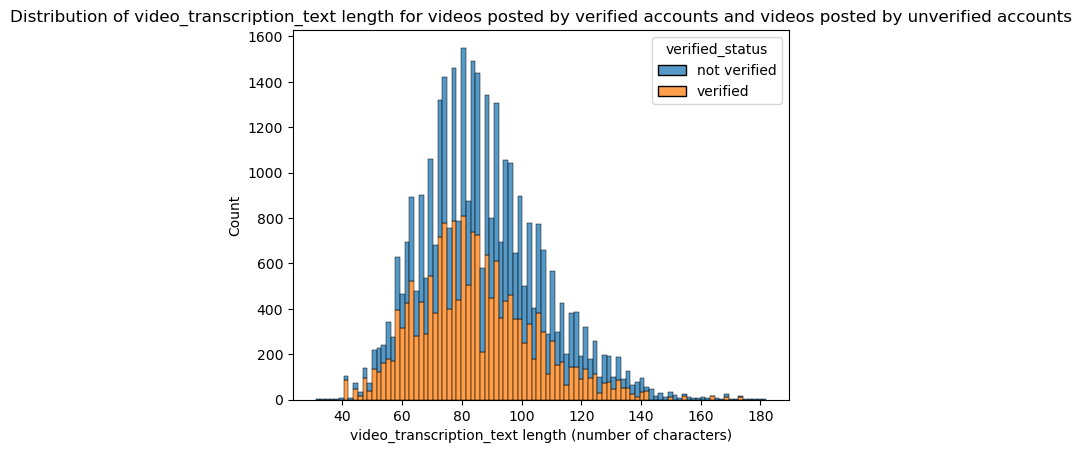

In [82]:
sns.histplot(data=df_upsampled,x='text_length',hue='verified_status',multiple='stack')
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

In [83]:
df_upsampled = df_upsampled.drop(columns=['like_per_view','share_per_view','comment_per_view'])

In [84]:
df_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [85]:
# Correlation matrix to help determine most correlated variables
df_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.417551,-0.504015,-0.487096,-0.413799,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,-0.021400,0.010515,0.008753,0.013983,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.001971,0.002206,0.003989,-0.004586,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.419032,0.711313,0.690048,0.583485,0.244693
video_like_count,-0.417551,-0.021400,0.001971,0.419032,1.000000,0.153834,0.058805,0.001655,0.144154
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.153834,1.000000,0.710117,0.620182,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.058805,0.710117,1.000000,0.857679,0.173396
video_comment_count,-0.413799,0.013983,-0.004586,0.583485,0.001655,0.620182,0.857679,1.000000,0.149750
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.144154,0.171651,0.173396,0.149750,1.000000


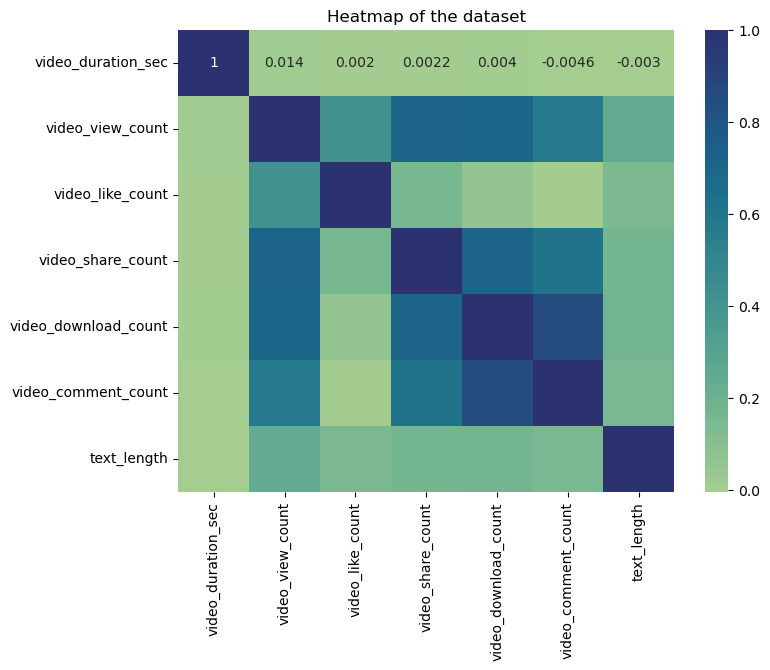

In [86]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    df_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
    .corr(numeric_only=True), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. To build a logistic regression model that meets this assumption, you could exclude `video_comment_count`. And among the variables that quantify video metrics, you could keep `video_view_count`, `video_share_count`, `video_download_count`, and `video_like_count` as features.

## Model building

In [89]:
y=df_upsampled['verified_status']

In [90]:
df_upsampled.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count', 'text_length'],
      dtype='object')

In [91]:
X = df_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count","video_like_count"]]


X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_like_count
0,59,claim,under review,343296.0,241.0,1.0,19425.0
1,32,claim,active,140877.0,19034.0,1161.0,77355.0
2,31,claim,active,902185.0,2858.0,833.0,97690.0
3,25,claim,active,437506.0,34812.0,1234.0,239954.0
4,19,claim,active,56167.0,4110.0,547.0,34987.0


In [92]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [93]:
# Getting shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

### Encoding **X_train**

In [95]:
# Checking data types
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_like_count        float64
dtype: object

In [96]:
# Selecting the training features that needs to be encoded
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [97]:
# Setting up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop=None, sparse_output=False)

# Fitting and transforming the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [98]:
# Getting feature names from encoder
X_encoder.get_feature_names_out()

array(['claim_status_claim', 'claim_status_opinion',
       'author_ban_status_active', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [99]:
# Displaying first few rows of encoded training features
X_train_encoded

array([[0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       ...,
       [0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0.]])

In [100]:
# Placing encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Displaying first few rows
X_train_encoded_df.head()

,claim_status_claim,claim_status_opinion,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0


In [101]:
# Displaying first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_like_count
33058,33,2252.0,23.0,4.0,829.0
20491,52,6664.0,550.0,53.0,2135.0
25583,37,6327.0,257.0,3.0,734.0
18474,57,1702.0,28.0,0.0,96.0
27312,21,3842.0,101.0,1.0,279.0


In [102]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_like_count,claim_status_claim,claim_status_opinion,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,829.0,0.0,1.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2135.0,0.0,1.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,734.0,0.0,1.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,96.0,0.0,1.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,279.0,0.0,1.0,1.0,0.0,0.0


### Encoding **y_train**

In [104]:
# Check data type of outcome variable
y_train.dtype

dtype('O')

In [105]:
# Get unique values of outcome variable
y_train.unique()

array(['verified', 'not verified'], dtype=object)

In [106]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [107]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

### Logistic Regression Model

In [109]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

### Encoding **X_test**

In [111]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

# Display first few rows
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [112]:
# Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
X_test_encoded

array([[0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0.],
       ...,
       [0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.]])

In [113]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_test_encoded_df.head()

,claim_status_claim,claim_status_opinion,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0


In [114]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_like_count
21061,41,2118.0,57.0,5.0,465.0
31748,27,5701.0,157.0,1.0,423.0
20197,31,449767.0,75385.0,5956.0,728.5
5727,19,792813.0,56597.0,5146.0,728.5
11607,54,2044.0,68.0,19.0,766.0


In [115]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_like_count,claim_status_claim,claim_status_opinion,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,465.0,0.0,1.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,423.0,0.0,1.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,728.5,1.0,0.0,1.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,728.5,1.0,0.0,1.0,0.0,0.0
4,54,2044.0,68.0,19.0,766.0,0.0,1.0,1.0,0.0,0.0


In [116]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test_final)

In [117]:
# Display the predictions on the encoded testing set
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

In [118]:
# Display the true labels of the testing set
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

### Encoding **y_test**

In [120]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

### **Checking Final Results**

In [122]:
# Get shape of each training and testing set
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 10), (26826,), (8942, 10), (8942,))

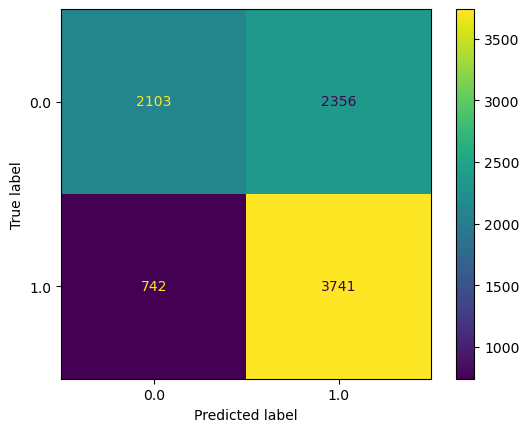

In [123]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives: the number of videos posted by unverified accounts that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of videos posted by unverified accounts that the model misclassified as posted by verified accounts.

The lower-left quadrant displays the number of false negatives: the number of videos posted by verified accounts that the model misclassified as posted by unverified accounts.

The lower-right quadrant displays the number of true positives: the number of videos posted by verified accounts that the model accurately classified as so.

In [125]:
# Create classification report for logistic regression model
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.47      0.58      4459
not verified       0.61      0.83      0.71      4483

    accuracy                           0.65      8942
   macro avg       0.68      0.65      0.64      8942
weighted avg       0.68      0.65      0.64      8942



In [126]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,0.009052
1,video_view_count,-0.000002
2,video_share_count,0.000005
3,video_download_count,-0.000108
4,video_like_count,-0.000005
5,claim_status_claim,-0.000079
6,claim_status_opinion,0.000383
7,author_ban_status_active,0.000317
8,author_ban_status_banned,-0.000015
9,author_ban_status_under review,0.000001


Key takeaways:

- The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. We decided to drop `video_like_count` from the model building.
- Based on the logistic regression model, each additional second of the video is associated with 0.009 increase in the log-odds of the user having a verified status.
- The logistic regression model had not great, but acceptable predictive power: a precision of 61% is less than ideal, but a recall of 84% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable. 


The model had decent predictive power. Based on the estimated model coefficients from the logistic regression, longer videos tend to be associated with higher odds of the user being verified. Other video features have small estimated coefficients in the model, so their association with verified status seems to be small.

## Classifying videos

**Split the data into train/validation/test sets (60/20/20)**

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)

In [131]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [132]:
# Checking class balance
df["claim_status"].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

Approximately 50.3% of the dataset represents claims and 49.7% represents opinions, so the outcome variable is balanced.

In [134]:
df['text_length']=df['video_transcription_text'].str.len()
df.head()

/var/folders/_b/hgv3srfd2z1d6sw190wtt1340000gp/T/ipykernel_23210/4241511049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length']=df['video_transcription_text'].str.len()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,like_per_view,share_per_view,comment_per_view,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000702,0.000000,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.135111,0.004855,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.003168,0.000365,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.079569,0.001335,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.073175,0.002706,128


In [135]:
df.groupby('claim_status')['text_length'].mean()

claim_status
claim      95.376978
opinion    82.722562
Name: text_length, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of video_transcription_text length for claims and opinions')

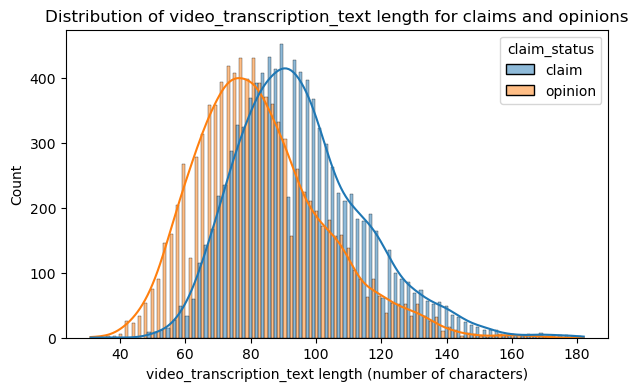

In [136]:
#Visualizing the data for text length using histogram for claim & opinions
plt.figure(figsize=(7,4))
sns.histplot(df,x='text_length',hue='claim_status',multiple='dodge',kde=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title('Distribution of video_transcription_text length for claims and opinions')

Letter count distributions for both claims and opinions are approximately normal with a slight right skew. Claim videos tend to have more characters&mdash;about 13 more on average, as indicated in a previous cell.

## Feature selection and transformation

In [139]:
X=df.copy()
X = X.drop(['#', 'video_id','like_per_view','share_per_view','comment_per_view','claim_status'], axis=1)

#Encoding Categorical Data
X = pd.get_dummies(X,
                   columns=['verified_status', 'author_ban_status'],
                   drop_first=True)

#Encoding Target Variable(Categorical)
y=df['claim_status'].replace({'opinion':0,'claim':1})


In [140]:
# Split the data into training and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [141]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

In [142]:
# Get shape of each training, validation, and testing set
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((11450, 11), (3817, 11), (3817, 11), (11450,), (3817,), (3817,))

## Tokenize text column

In [144]:
# Set up a `CountVectorizer` object, which converts a collection of text to a matrix of token counts
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

In [145]:
# Extract numerical features from `video_transcription_text` in the training set
count_data = count_vec.fit_transform(X_train['video_transcription_text']).toarray()
count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [146]:
# Place the numerical representation of `video_transcription_text` from training set into a dataframe
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())

# Display first few rows
count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
X_train_final = pd.concat([X_train.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,51,2487.0,310.0,20.0,1.0,0.0,134,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,43,118512.0,3543.0,374.0,70.0,29.0,97,False,True,False,...,0,1,0,0,0,0,0,0,0,0
2,22,105902.0,1885.0,229.0,39.0,9.0,76,False,False,True,...,0,1,0,0,0,0,0,0,0,0
3,17,9245.0,1670.0,440.0,13.0,4.0,58,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,18,3791.0,660.0,63.0,9.0,1.0,57,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [148]:
# Extract numerical features from `video_transcription_text` in the testing set
validation_count_data = count_vec.transform(X_val['video_transcription_text']).toarray()
validation_count_data

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [149]:
# Place the numerical representation of `video_transcription_text` from validation set into a dataframe
validation_count_df = pd.DataFrame(data=validation_count_data, columns=count_vec.get_feature_names_out())
validation_count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [150]:
# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_val after dropping `video_transcription_text`,
# so that the indices align with those in `validation_count_df`
X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)

# Display first few rows
X_val_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,11,578891.0,2880.125,14612.0,6591.0,44.0,72,False,False,True,...,0,0,0,0,0,0,0,1,0,0
1,24,6255.0,1709.000,311.0,13.0,1.0,96,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,35,410356.0,728.500,26235.0,2060.0,1252.0,88,False,False,False,...,0,1,0,0,0,0,0,1,0,0
3,58,406911.0,25986.000,1230.0,564.0,248.0,83,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,47,972573.0,728.500,25320.0,3331.0,968.0,104,False,False,True,...,0,0,0,0,0,0,0,1,0,0


Repeating the process to get n-gram counts for the test data.

In [152]:
# Extract numerical features from `video_transcription_text` in the testing set
test_count_data = count_vec.transform(X_test['video_transcription_text']).toarray()

# Place the numerical representation of `video_transcription_text` from test set into a dataframe
test_count_df = pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())

# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']
                                      ).reset_index(drop=True), test_count_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,54,692084.0,135956.0,16591.0,622.0,312.0,107,False,False,False,...,0,0,0,1,1,0,0,0,0,0
1,37,5164.0,1858.0,36.0,17.0,1.0,69,True,False,True,...,0,0,0,0,0,0,0,0,0,0
2,39,801951.0,728.5,57608.0,8578.0,2942.0,90,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,44,6429.0,2314.0,847.0,17.0,5.0,76,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,26,555780.0,106863.0,15348.0,252.0,91.0,72,False,False,False,...,0,0,0,0,0,0,0,0,0,0


## Random Forest Model

In [154]:
rf = RandomForestClassifier(random_state=0)

cv_params={'min_samples_leaf':[1,2],
            'min_samples_split':[2,3],
            'max_depth':[5,7,None],
            'max_features':[0.3,0.6],
            'n_estimators':[75,100,200],
            'max_samples': [0.7]
            }

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [155]:
%%time
rf_cv.fit(X_train_final, y_train)

CPU times: user 4min 39s, sys: 3.13 s, total: 4min 42s
Wall time: 5min 25s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'accuracy', 'recall', 'f1', 'precision'})

In [156]:
rf_cv.best_score_

0.9948229743644765

In [157]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

This model performs exceptionally well, with an average recall score of 0.995 across the five cross-validation folds. After checking the precision score to be sure the model is not classifying all samples as claims, it is clear that this model is making almost perfect classifications.

## XGBoost model

In [160]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [161]:
X_train_final

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,51,2487.0,310.0,20.0,1.0,0.0,134,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,43,118512.0,3543.0,374.0,70.0,29.0,97,False,True,False,...,0,1,0,0,0,0,0,0,0,0
2,22,105902.0,1885.0,229.0,39.0,9.0,76,False,False,True,...,0,1,0,0,0,0,0,0,0,0
3,17,9245.0,1670.0,440.0,13.0,4.0,58,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,18,3791.0,660.0,63.0,9.0,1.0,57,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11445,39,6358.0,1599.0,307.0,27.0,0.0,73,True,False,False,...,0,0,0,0,0,0,0,0,0,1
11446,19,1972.0,379.0,43.0,4.0,0.0,69,False,False,False,...,0,0,0,0,0,0,0,0,0,0
11447,34,843938.0,728.5,2375.0,12643.0,4104.0,142,False,False,False,...,0,0,0,0,0,0,0,1,0,0
11448,21,5922.0,1815.0,44.0,29.0,10.0,106,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [162]:
print(X_train_final.dtypes)

video_duration_sec                  int64
video_view_count                  float64
video_like_count                  float64
video_share_count                 float64
video_download_count              float64
video_comment_count               float64
text_length                         int64
verified_status_verified             bool
author_ban_status_banned             bool
author_ban_status_under review       bool
colleague discovered                int64
colleague learned                   int64
colleague read                      int64
discovered news                     int64
discussion board                    int64
friend learned                      int64
friend read                         int64
internet forum                      int64
learned media                       int64
media claim                         int64
news claim                          int64
point view                          int64
read media                          int64
social media                      

In [163]:
%%time
xgb_cv.fit(X_train_final, y_train)

CPU times: user 3min 17s, sys: 1min 2s, total: 4min 20s
Wall time: 42.5 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring={'accuracy', 'recall', 'f1', 'precision'})

In [164]:
xgb_cv.best_score_

0.989645054622456

In [165]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 300}

## Evaluate models

**Evaluate models against validation data**

**Random Forest Model**

In [168]:
# Using the random forest "best estimator" model to get predictions on the validation set
y_pred = rf_cv.best_estimator_.predict(X_val_final)

In [169]:
# Displaying the predictions on the validation set
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [170]:
# Displaying the true labels of the validation set
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

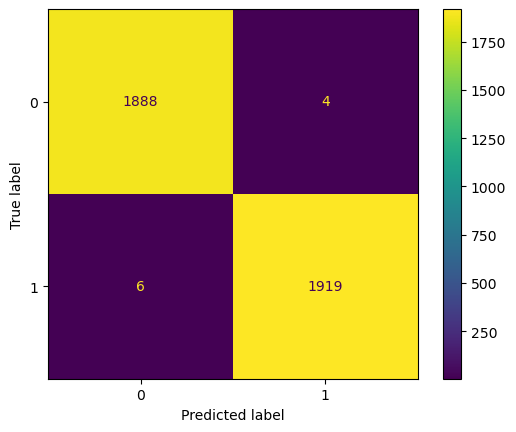

In [171]:
# Creating a confusion matrix to visualize the results of the classification model

# Computing values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Creating display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plotting confusion matrix
log_disp.plot()

# Displaying plot
plt.show()

In [172]:
# Creating a classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**XG Boost Model**

In [174]:
y_pred = xgb_cv.best_estimator_.predict(X_val_final)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

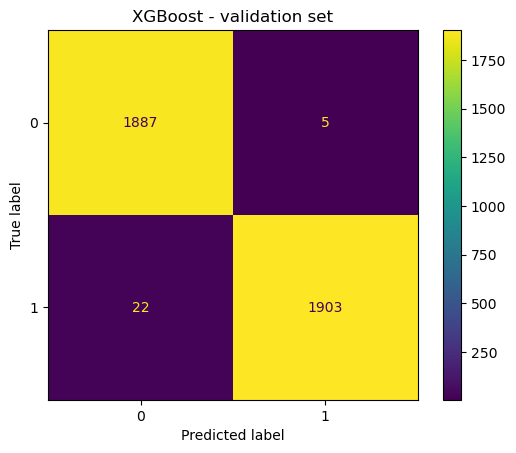

In [175]:
# Computing values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Creating display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plotting confusion matrix
log_disp.plot()

# Displaying plot
plt.title('XGBoost - validation set');
plt.show()


In [176]:
# Creating a classification report
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



Both random forest and XGBoost model architectures resulted in nearly perfect models. Nonetheless, in this case random forest performed a little bit better, so it is the champion model.

## Using Random Forest (Champion Model)

In [179]:
y_pred = rf_cv.best_estimator_.predict(X_test_final)

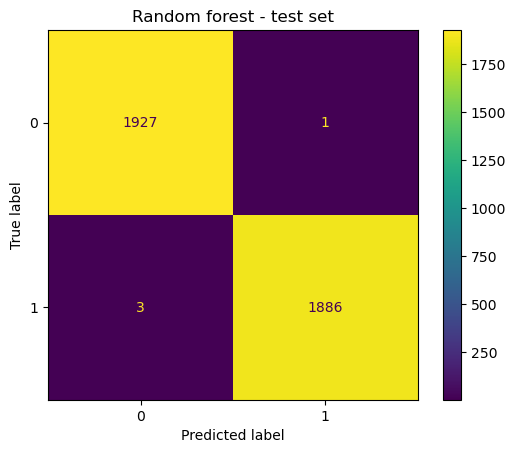

In [180]:
# Computing values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Creating display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plotting confusion matrix
log_disp.plot()

# Displaying plot
plt.title('Random forest - test set');
plt.show()

In [181]:
# Creating a classification report
target_labels = ['opinion', 'claim']
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1928
       claim       1.00      1.00      1.00      1889

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



## Feature importance

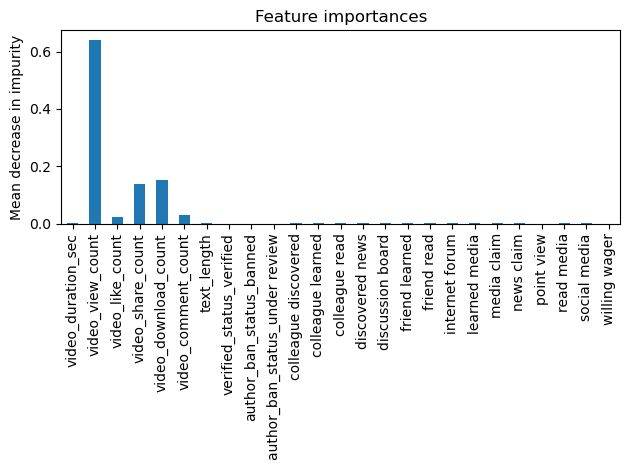

In [183]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test_final.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

1. This model performed well on both the validation and test holdout data. Furthermore, both precision and F<sub>1</sub> scores were consistently high. The model very successfully classified claims and opinions.
</br>
2. The model's most predictive features were all related to the user engagement levels associated with each video. It was classifying videos based on how many views, likes, shares, and downloads they received.
</br>
3. Because the model currently performs nearly perfectly, there is no need to engineer any new features.
</br>
4. The current version of the model does not need any new features. However, it would be helpful to have the number of times the video was reported. It would also be useful to have the total number of user reports for all videos posted by each author.